<h1>Análise dos Dados do ZombieHealth DataSet </h1>

O objetivo desse notebook é abordar a visualização de alguns dados do ZombieHealth dataset.

In [1]:
import pandas as pd
ds = pd.read_csv("zombie-health-cases500.csv")
ds.head()

,Paralisia,Língua Amarela,Dedo Tremendo,Perda de Membro,Dor no Peito,Raiva Severa,Olho vermelho,Pele azul,Diagnóstico
0,0,0,1,0,0,0,0,0,Zulombriga
1,0,0,0,1,1,1,0,0,Briga
2,0,0,0,0,0,0,1,1,Gripe Aviaria
3,0,0,0,1,0,0,0,0,Infecção Bacteriana
4,0,0,0,0,0,1,0,1,T-Virus


<h2>Distribuição das doenças no DataSet</h2>

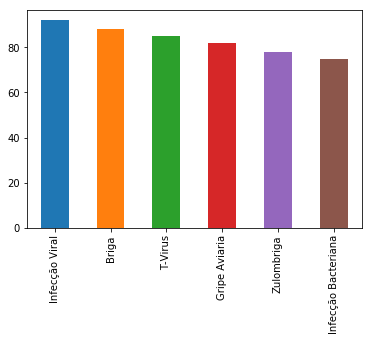

In [4]:
ds['diagnostic'].value_counts().plot.bar()

<h2>Tratamento dos Dados</h2>

In [5]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in range(len(ds.columns) - 1):
    ds.iloc[:, i] = enc.fit_transform(ds.iloc[:,i])
ds.head(10)

,Paralisia,Língua Amarela,Dedo Tremendo,Perda de Membro,Dor no Peito,Raiva Severa,Olho vermelho,Pele azul,Diagnóstico
0,0,0,1,0,0,0,0,0,Zulombriga
1,0,0,0,1,1,1,0,0,Briga
2,0,0,0,0,0,0,1,1,Gripe Aviaria
3,0,0,0,1,0,0,0,0,Infecção Bacteriana
4,0,0,0,0,0,1,0,1,T-Virus
5,0,0,1,1,0,0,0,0,Zulombriga
6,0,0,0,0,1,0,0,0,Infecção Viral
7,0,1,1,1,0,0,0,0,Zulombriga
8,0,1,0,0,0,0,0,1,Infecção Bacteriana
9,0,0,0,1,1,1,0,0,Briga


In [6]:
one_hot = pd.get_dummies(ds['diagnostic'])
ds.pop('diagnostic')
ds = ds.join(one_hot)
ds.head(20)

,Paralisia,Língua Amarela,Dedo Tremendo,Perda de Membro,Dor no Peito,Raiva Severa,Olho vermelho,Pele azul,Briga,Gripe Aviaria,Infecção Bacteriana,Infecção Viral,T-Virus,Zulombriga
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,1,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,1,0
5,0,0,1,1,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0,0,0,0,1,0,0
7,0,1,1,1,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0,1,0,0,1,0,0,0
9,0,0,0,1,1,1,0,0,1,0,0,0,0,0


<h2>Heatmap de Correlações entre doença e sintomas</h2>

A tabela de correlações utilizada para gerar este heatmap, será a utilizada para o médico realizar as perguntas.

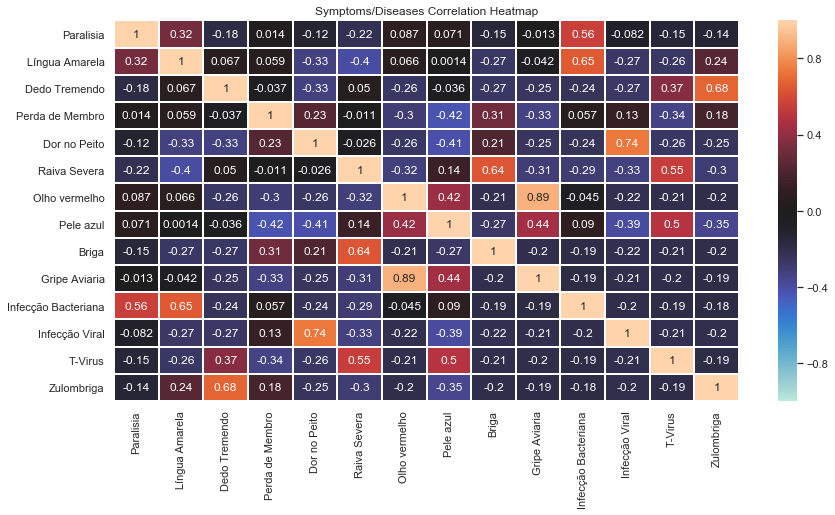

In [7]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

corr =ds.corr()
plt.figure(figsize=(14,7))
plt.title('Symptoms/Diseases Correlation Heatmap')
ax = sns.heatmap(corr, center=0, vmin=-1, vmax=1, annot=True, linewidths=1)
